In [1]:
from ReplayBuffer import *

In [88]:
import matplotlib.pyplot as plt
import matplotlib
import joblib
import numpy as np

In [42]:
rb = joblib.load('../runs/test/model_latest/ReplayBuffer_test.joblib')

In [43]:
rb.state[:1250]

array([[-1.30300000e-02,  2.29000000e-03,  2.52520000e-01,
         3.70000000e-01, -4.53119316e-17,  2.50000000e-01],
       [-1.30300000e-02,  2.29000000e-03,  2.52520000e-01,
         3.70000000e-01, -4.53119316e-17,  3.00000000e-01],
       [-1.30300000e-02,  2.29000000e-03,  2.52520000e-01,
         3.70000000e-01, -4.53119316e-17,  3.50000000e-01],
       ...,
       [-1.30300000e-02,  2.29000000e-03,  2.52520000e-01,
         5.50000000e-01,  6.73555740e-17,  3.50000000e-01],
       [-1.30300000e-02,  2.29000000e-03,  2.52520000e-01,
         5.50000000e-01,  6.73555740e-17,  4.00000000e-01],
       [-1.30300000e-02,  2.29000000e-03,  2.52520000e-01,
         5.50000000e-01,  6.73555740e-17,  4.50000000e-01]])

In [44]:
rb.state[:1250][:,3:]

array([[ 3.70000000e-01, -4.53119316e-17,  2.50000000e-01],
       [ 3.70000000e-01, -4.53119316e-17,  3.00000000e-01],
       [ 3.70000000e-01, -4.53119316e-17,  3.50000000e-01],
       ...,
       [ 5.50000000e-01,  6.73555740e-17,  3.50000000e-01],
       [ 5.50000000e-01,  6.73555740e-17,  4.00000000e-01],
       [ 5.50000000e-01,  6.73555740e-17,  4.50000000e-01]])

In [45]:
rb.reward[:1250]

array([[247.36972101],
       [166.36943811],
       [345.20209119],
       ...,
       [160.39223946],
       [162.95640781],
       [170.88003551]])

(array([113., 372., 387., 259., 101.,  11.,   4.,   1.,   1.,   1.]),
 array([   2.29037485,  116.86086541,  231.43135598,  346.00184655,
         460.57233712,  575.14282768,  689.71331825,  804.28380882,
         918.85429938, 1033.42478995, 1147.99528052]),
 <BarContainer object of 10 artists>)

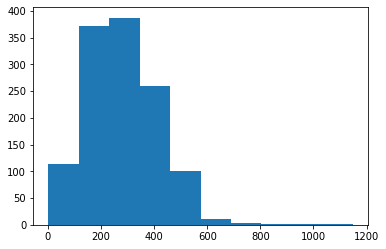

In [46]:
plt.hist(rb.reward[:1250])

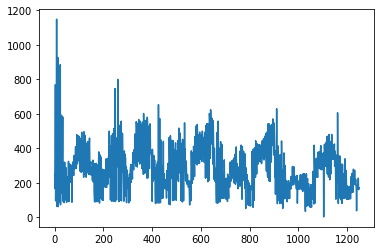

In [136]:
plt.plot(rb.reward[:1250])

In [331]:
target_points = rb.state[:1250][:,3:]
rewards = rb.reward[:1250]

In [332]:
rewards.max()

1147.9952805191756

In [369]:
cmap = matplotlib.cm.turbo_r
norm = matplotlib.colors.Normalize(vmin=0, vmax=1200)
# cmap = matplotlib.cm.turbo_r

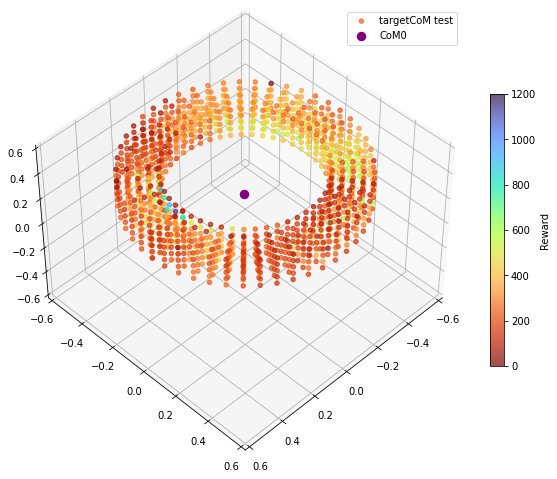

In [370]:
fig = fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.set_xlim(-.6,.6)
ax.set_ylim(-.6,.6)
ax.set_zlim(-.6,.6)
ax.view_init(45,45)
test_reward = ax.scatter(target_points[:,0],target_points[:,1],target_points[:,2],c=rewards, alpha=0.7, cmap=cmap, norm=norm, label="targetCoM test")
ax.scatter(1.30300000e-02,  2.29000000e-03,  2.52520000e-01,linewidths=5,color="purple", label="CoM0")
cbar = plt.colorbar(test_reward,shrink=0.5)
cbar.set_label("Reward")
ax.legend()

In [371]:
idx = rewards.flatten() >= 200

In [372]:
feaseble_rewards = rewards[idx]

In [373]:
feasible_region = target_points[idx,:]

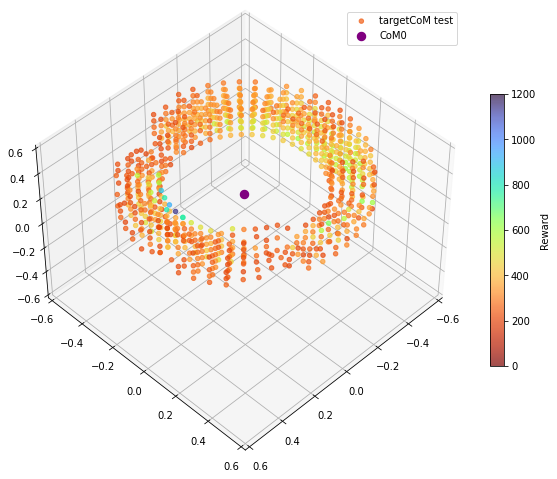

In [374]:
fig = fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.set_xlim(-.6,.6)
ax.set_ylim(-.6,.6)
ax.set_zlim(-.6,.6)
ax.view_init(45,45)
feasible_reward = ax.scatter(feasible_region[:,0],feasible_region[:,1],feasible_region[:,2],c=feaseble_rewards, alpha=0.7, cmap=cmap, norm=norm, label="targetCoM test")
ax.scatter(1.30300000e-02,  2.29000000e-03,  2.52520000e-01,linewidths=5,color="purple", label="CoM0")
cbar = plt.colorbar(feasible_reward,shrink=0.5)
cbar.set_label("Reward")
ax.legend()

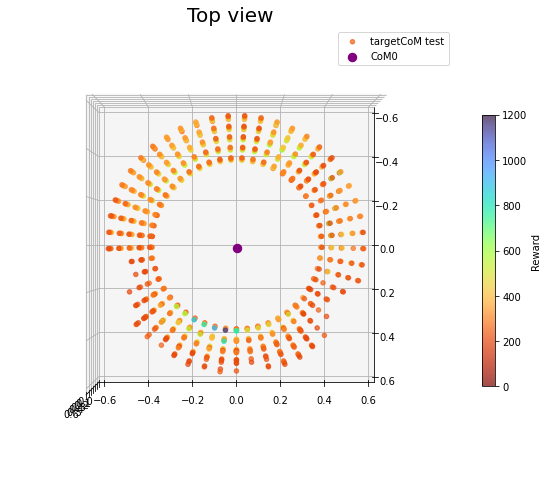

In [375]:
fig = fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.set_xlim(-.6,.6)
ax.set_ylim(-.6,.6)
ax.set_zlim(0,.6)
ax.view_init(azim=0,elev=90)
feasible_reward = ax.scatter(feasible_region[:,0],feasible_region[:,1],feasible_region[:,2],c=feaseble_rewards, alpha=0.7, cmap=cmap, norm=norm, label="targetCoM test")
ax.scatter(1.30300000e-02,  2.29000000e-03,  2.52520000e-01,linewidths=5,color="purple", label="CoM0")
cbar = plt.colorbar(feasible_reward,shrink=0.5)
cbar.set_label("Reward")
ax.legend()
ax.set_title("Top view",fontsize=20)
fig.show()

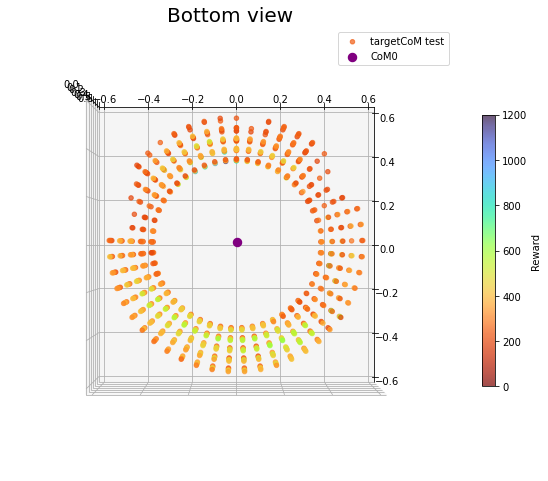

In [362]:
fig = fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.set_xlim(-.6,.6)
ax.set_ylim(-.6,.6)
ax.set_zlim(0,.6)
ax.view_init(azim=0,elev=-90)
feasible_reward = ax.scatter(feasible_region[:,0],feasible_region[:,1],feasible_region[:,2],c=feaseble_rewards, alpha=0.7, cmap=cmap, norm=norm, label="targetCoM test")
ax.scatter(1.30300000e-02,  2.29000000e-03,  2.52520000e-01,linewidths=5,color="purple", label="CoM0")
cbar = plt.colorbar(feasible_reward,shrink=0.5)
cbar.set_label("Reward")
ax.legend()
ax.set_title("Bottom view",fontsize=20)
fig.show()